## Понижение размерности данных. PCA, T-SNE.

In [1]:
# импорт библиотек

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import datasets
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Для сходимости ответов у вас должен быть установлен sklearn версии 0.21.3

In [2]:
print(sklearn.__version__)

0.21.3


## Применение метода главных компонент. Часть 1

Рассмотрим заданную выборку.

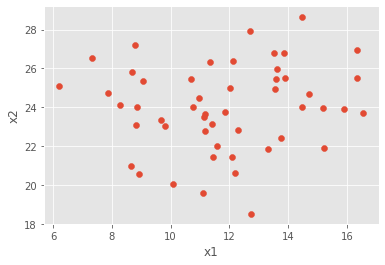

In [3]:
data = np.array([[11.19, 22.78],[ 8.93, 20.54],[16.35, 25.52],[12.04, 24.98],[ 8.68, 25.81],
                 [11.36, 26.34],[13.55, 24.96],[14.48, 28.67],[13.6 , 25.46],[ 7.33, 26.53],
                 [14.49, 24.01],[15.23, 21.89],[13.51, 26.77],[11.84, 23.75],[10.77, 24.01],
                 [ 8.85, 23.99],[ 8.28, 24.12],[ 8.8 , 27.2 ],[11.43, 21.42],[ 8.65, 20.95],
                 [10.69, 25.46],[ 7.87, 24.72],[ 9.07, 25.37],[13.85, 26.8 ],[15.18, 23.96],
                 [12.1 , 21.44],[12.72, 27.93],[13.33, 21.83],[12.21, 20.62],[15.92, 23.93],
                 [13.76, 22.4 ],[11.59, 22.02],[ 9.67, 23.33],[11.14, 23.51],[10.98, 24.47],
                 [11.41, 23.12],[12.74, 18.52],[ 9.81, 23.01],[13.62, 25.98],[12.12, 26.36],
                 [14.73, 24.69],[ 8.81, 23.09],[ 6.22, 25.08],[11.18, 23.63],[12.29, 22.83],
                 [10.09, 20.06],[16.56, 23.68],[16.35, 26.95],[11.1 , 19.58],[13.9 , 25.5 ]])
plt.scatter(data[:,0], data[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Найдите векторы, задающие главные компоненты в этих данных. Не забудьте отцентрировать выборку перед расчетами. Визуализируйте прямые, направленные вдоль данных векторов поверх отцентрированной выборки.

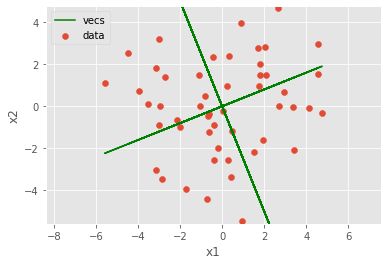

In [12]:
# Ваш код
data_centered = data - np.mean(data, axis = 0)
#plt.scatter(data_centered[:,0], data_centered[:,1])
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.show()
covmat = np.cov(data_centered.T)

_, vecs = np.linalg.eig(covmat)

plt.scatter(data_centered[:,0], data_centered[:,1], label = 'data')
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_centered[:,0], (vecs[1,0]/vecs[0,0])*data_centered[:,0], color="g", label = 'vecs')
plt.plot(data_centered[:,0], (vecs[1,1]/vecs[0,1])*data_centered[:,0], color="g")
plt.axis('equal')
limits = [np.minimum(np.amin(data_centered[:,0]), np.amin(data_centered[:,1])),
          np.maximum(np.amax(data_centered[:,0]), np.amax(data_centered[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.draw()

Спроецируйте точки отцентрированной выборки на прямые, соответствующие получившимся векторам. Для каждой прямой рассчитайте дисперсию проекций. Для расчета диспресии используйте функцию np.var, в ней укажите параметр `ddof`=1.

Небольшое пояснение: чтобы рассчитать проекции, нужно векторно умножить отцентрированную выборку (data_centerd) на матрицу с собственными векторами (vecs). Векторное умножение можно осуществить с помощью функции np.dot(). Вы получите матрицу, столбцы которой будут проекциями на ту или иную компоненту. Далее вам остается вычислить дисперсии по каждому из двух отдельных столбцов.

In [14]:
# Ваш код
projection = np.dot(data_centered, vecs)

In [17]:
#projection
vecs

array([[ 0.92832319, -0.37177419],
       [ 0.37177419,  0.92832319]])

In [18]:
var_1 = np.var(new_data[:,0], ddof=1)
var_2 = np.var(new_data[:,1], ddof=1)
print(round(var_1,2), round(var_2,2))

6.69 4.71


**<font color='red'>Вопрос 1.</font> Каково максимальное значение среди двух полученных дисперсий? Ответ округлите до двух знаков после запятой.**
- 4.71
- 6.69
- 4.29
- 6.92

**Answer:** 6.69

Выделите тот вектор, дисперсия данных вдоль которого максимальна. Рассчитайте угол в градусах, который он образует относительно оси x1. Для вычисления арктангенса используйте функцию np.arctan. Для перевода из радиан в градусы используйте np.degrees.

In [21]:
# Ваш код
round(np.degrees(np.arctan(vecs[1,0]/vecs[0,0])))

22.0

**<font color='red'>Вопрос 2.</font> Какой угол образует данный вектор относительно оси x1? Ответ округлите до целой части.**
- 27
- 22
- 34
- 25

**Answer:** 22

## Применение метода главных компонент. Часть 2

На практическом занятии мы убедились, что применение PCA может достаточно сильно улучшить качество работы деревьев решений и ансамблей на их основе.
В этом задании мы будем работать с датасетом Сalifornia housing. Решать предстоит задачу регресси: прогнозирование цены недвижимости (признак Price).
Для оценки качества модели мы будем использовать коэффициент детерминации r2.

In [23]:
data = pd.read_csv('California_housing.csv')
X = data.drop('Price', axis = 1)
y = data['Price']

Разделите выборку на обучающую и тестовую в соотношении 7:3. Зафиксируйте `random_state`=20. Обучите дерево решений с максимальной глубиной, равной девяти, на обучающей выборке (зафиксируйте `random_state`=20) и оцените скор на тестовой. 

In [24]:
# Ваш код
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [26]:
estimator = DecisionTreeRegressor(max_depth=9, random_state=20)
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)

Далее примените метод главных компонент, предварительно отмасштабировав данные. Постройте график зависимости доли оставшейся дисперсии от числа компонент.

In [27]:
# Ваш код
pca = PCA()
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.25336868, 0.23516245, 0.15888635, 0.12887971, 0.12538195,
       0.0824225 , 0.01020022, 0.00569814])

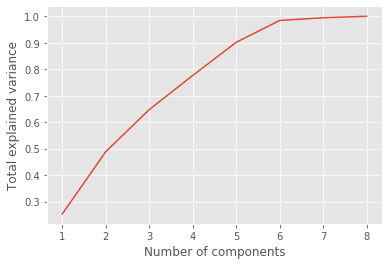

In [28]:
total_explained_variance = []
n_components = np.arange(1, len(explained_variance_ratio) + 1)
for i in n_components:
    total_explained_variance.append(explained_variance_ratio[:i].sum())
plt.plot(n_components, total_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.show();

**<font color='red'>Вопрос 3.</font> Какое минимальное число главных компонент необходимо выбрать для сохраниения 90% дисперсии исходных данных?**

**Answer:** 5

Осуществите снижение размерности исходного датасета до той, что получилась в предыдущем задании. Разделите новый датасет на обучающую и тестовую выбору в соотношении 7:3. Зафиксируйте `random_state`=20. Обучите дерево решений с максимальной глубиной, равной девяти, на обучающей выборке (зафиксируйте `random_state`=20) и оцените скор на тестовой. 

In [29]:
# Ваш код
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=20)

model = DecisionTreeRegressor(max_depth=9, random_state=20)
model.fit(X_train, y_train) 
new_preds = model.predict(X_test)

r2_score(y_test, new_preds)

0.516264609466066

**<font color='red'>Вопрос 4.</font> На сколько изменился скор на тесте после понижения размерности? Ответ округлите до двух знаков после запятой. В случае снижения скора перед значением укажите знак минус.**

In [33]:
round(r2_score(y_test, new_preds)-r2_score(y_test, preds),2)

-0.19

**<font color='red'>Вопрос 5.</font> Чем объясняется получившееся изменение скора на тесте?**
- Предположения о том, что наиболее важны те направления в данных, вдоль которых они имеют наибольшую дисперсию, и о том, что данные можно анализировать линейными методами, не соответствуют действительности для данного случая
- Сложностью дерева решений
- Предположения о том, что наиболее важны те направления в данных, вдоль которых они имеют наибольшую дисперсию, и о том, что данные можно анализировать линейными методами, соответствуют действительности для данного случая
- Понижение размерности неприменимо при решении задач регрессии 

In [ ]:
**Answer:** 

## T-SNE

В этом задании мы будем работать с датасетом Breast cancer. Целевой признак, записанный в переменную y, отражает то, подтвердился ли у пациента диагноз.

In [34]:
X, y = datasets.load_breast_cancer(return_X_y=True)

С помощью T-SNE осуществите снижение размерности датасета до двух новых признаков, предварительно отмасштабировав данные, и визуализируйте его. При применении T-SNE зафиксируйте `random_state`=20. Точки, соответствующие здоровым и больным пациентам, закрасьте разными цветами.

In [35]:
# Ваш код
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=20)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne

array([[-10.543537 , -35.25458  ],
       [-17.962523 , -23.761608 ],
       [-13.775927 , -30.297924 ],
       ...,
       [ -1.7774107, -15.684377 ],
       [-12.269828 , -36.938675 ],
       [ 16.537277 ,  27.061043 ]], dtype=float32)

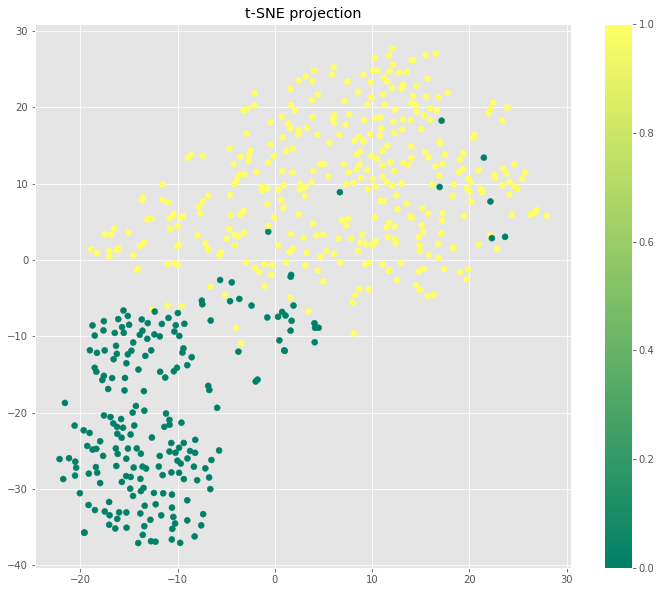

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap = 'summer')
plt.colorbar()
plt.title('t-SNE projection')
plt.show()

**<font color='red'>Вопрос 6.</font> Опишите картину визуализации данных после понижения размерности с помощью t-SNE**
- Данные четко разбиваются на два кластера, в каждом кластере присутствуют объекты строго одного класса
- Данные разбиваются на два облака точек, расположенных близко друг к другу, в каждом облаке наблюдается явное преобладание объектов конкретного класса
- Данные разбиваются на два облака точек, расположенных близко друг к другу, однако в каждом облаке нет преобладающего класса
- Данные не разбиваются на кластера, точки, соответствующие разным классам, перемешаны между собой

**Answer:** Данные разбиваются на два облака точек, расположенных близко друг к другу, в каждом облаке наблюдается явное преобладание объектов конкретного класса